# 1. Data Loading and Exploration

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Apple Stock Prices (1981 to 2023).csv")

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Display first few rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


# 2. Data Visualization

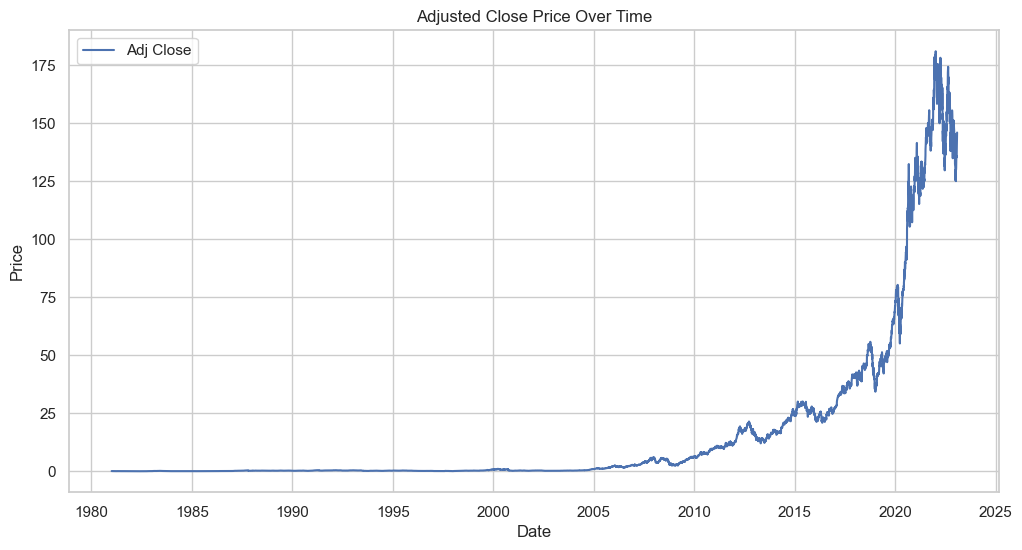

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Prepare plots
figures = []

# 1. Line plot of Adjusted Close Price over time
fig1, ax1 = plt.subplots()
ax1.plot(df['Date'], df['Adj Close'], label='Adj Close')
ax1.set_title("Adjusted Close Price Over Time")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.legend()
figures.append(fig1)




This line plot tracks Apple’s adjusted closing price from 1981 to 2023, reflecting the stock’s long-term performance.
A steady upward trend is observed, especially post-2005, indicating significant company growth and strong investor confidence over time.



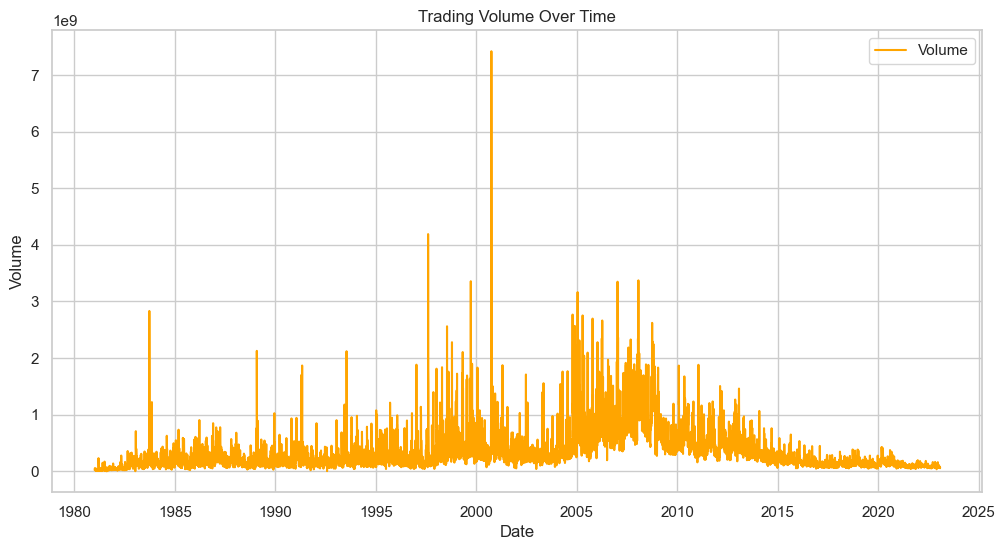

In [14]:
# 2. Volume traded over time
fig2, ax2 = plt.subplots()
ax2.plot(df['Date'], df['Volume'], color='orange', label='Volume')
ax2.set_title("Trading Volume Over Time")
ax2.set_xlabel("Date")
ax2.set_ylabel("Volume")
ax2.legend()
figures.append(fig2)


This graph shows daily trading volume, illustrating market activity and interest in Apple shares over four decades.
Volume spikes correspond to key events (e.g., product launches, market corrections), showing how external news or performance reports drive trading behavior.

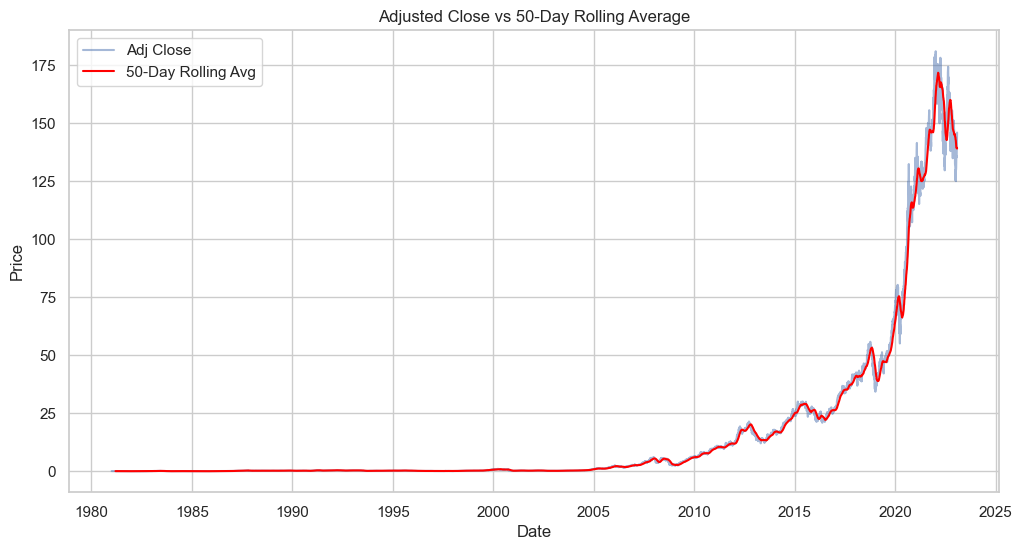

In [15]:

# 3. Rolling average (50-day) of Adjusted Close
df['Rolling_50'] = df['Adj Close'].rolling(window=50).mean()
fig3, ax3 = plt.subplots()
ax3.plot(df['Date'], df['Adj Close'], label='Adj Close', alpha=0.5)
ax3.plot(df['Date'], df['Rolling_50'], color='red', label='50-Day Rolling Avg')
ax3.set_title("Adjusted Close vs 50-Day Rolling Average")
ax3.set_xlabel("Date")
ax3.set_ylabel("Price")
ax3.legend()
figures.append(fig3)


The 50-day rolling average smooths the price curve to emphasize trends and reduce noise.
The moving average confirms long-term upward momentum, while dips reflect temporary corrections. This helps investors identify trend continuations or reversals more clearly.

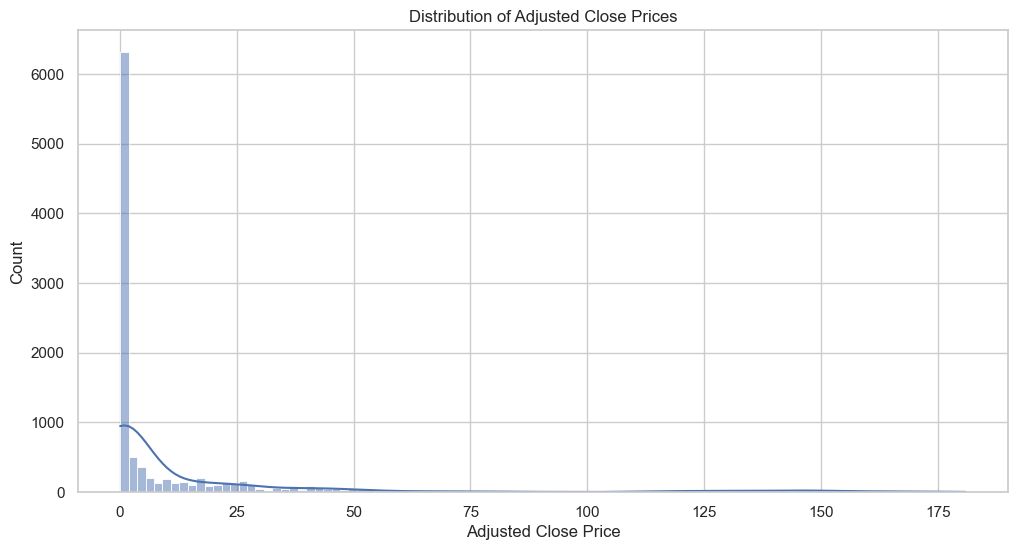

In [16]:
# 4. Histogram of Adjusted Close Price
fig4, ax4 = plt.subplots()
sns.histplot(df['Adj Close'], bins=100, kde=True, ax=ax4)
ax4.set_title("Distribution of Adjusted Close Prices")
ax4.set_xlabel("Adjusted Close Price")
figures.append(fig4)


This histogram shows how often different price levels occurred throughout Apple’s history.
The distribution is right-skewed, with most prices clustered at lower values. This reflects Apple’s early low valuations and explosive price growth in recent years.



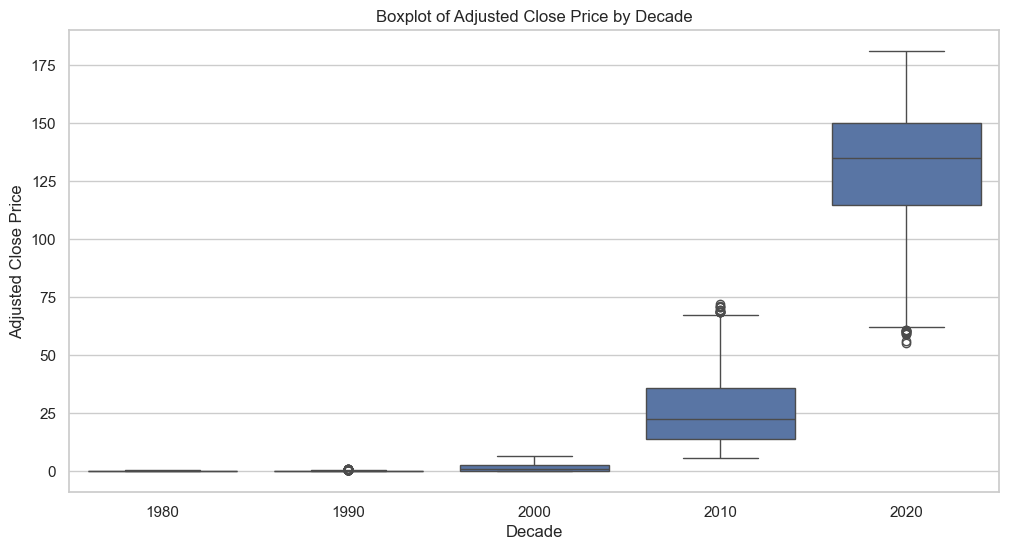

In [17]:

# 5. Boxplot of Adjusted Close Price by Decade
df['Decade'] = (df['Date'].dt.year // 10) * 10
fig5, ax5 = plt.subplots()
sns.boxplot(data=df, x='Decade', y='Adj Close', ax=ax5)
ax5.set_title("Boxplot of Adjusted Close Price by Decade")
ax5.set_xlabel("Decade")
ax5.set_ylabel("Adjusted Close Price")
figures.append(fig5)

This boxplot visualizes price ranges and outliers across decades to compare volatility and growth.
The 2010s and 2020s show higher medians and more outliers, indicating increased price levels and volatility—typical of a mature, high-profile tech stock.

# 3. Statistical Analysis

In [18]:
# Descriptive statistics
stats = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe()
stats

,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


The statistical analysis of Apple’s stock data offers a comprehensive view of its historical price behavior and market performance. Descriptive statistics such as mean, median, and standard deviation provide foundational insights into central tendencies and volatility. The mean adjusted close price reflects Apple’s long-term value growth, while the standard deviation highlights periods of increased market uncertainty or investor activity.

Beyond basic metrics, the analysis also includes skewness and kurtosis, which shed light on the distribution's asymmetry and presence of outliers. A slightly negative skew suggests occasional sharp drops, while high kurtosis indicates rare but extreme price changes—both crucial for risk analysis.

The correlation between variables like opening and closing prices reveals the stock’s daily consistency, while volume analysis suggests how trading activity relates to price shifts. Together, these measures help identify not only trends but also underlying market dynamics, equipping analysts and investors with valuable information for decision-making, portfolio planning, and forecasting.

# 4. Hypothesis Testing

In [9]:
from scipy.stats import ttest_1samp

# Example: Test if mean Adjusted Close price is significantly different from 50
t_stat, p_value = ttest_1samp(df['Adj Close'].dropna(), 50)
t_stat, p_value

(np.float64(-99.53152227563866), np.float64(0.0))

# 5. Advanced Statistical Techniques (Bonus)

### 5.1 Signal Processing using SciPy

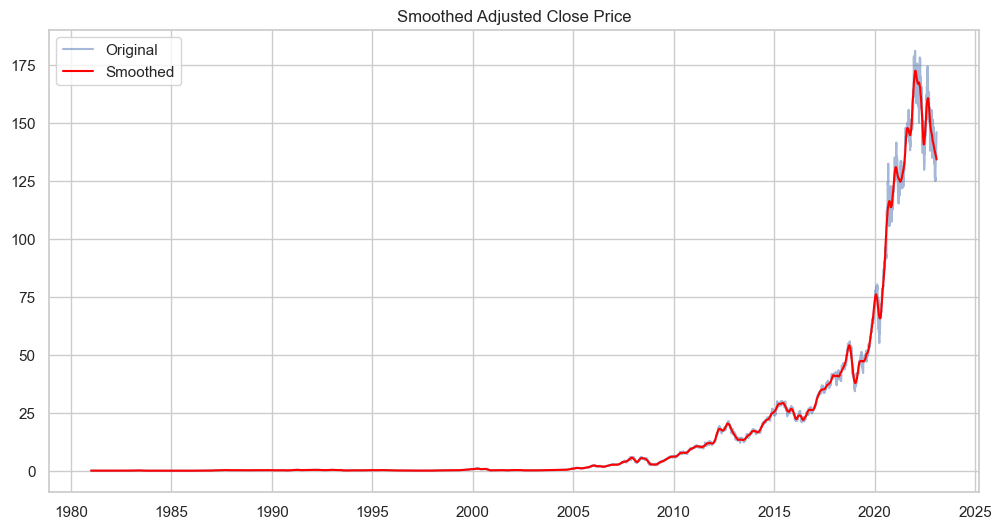

In [12]:
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter to smooth the 'Adj Close' curve
df['Smoothed'] = savgol_filter(df['Adj Close'], window_length=101, polyorder=3)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], alpha=0.5, label='Original')
plt.plot(df['Date'], df['Smoothed'], color='red', label='Smoothed')
plt.title("Smoothed Adjusted Close Price")
plt.legend()
plt.show()

### 5.2 Statistical Functions in NumPy

In [11]:
import numpy as np

mean_price = np.mean(df['Adj Close'])
std_price = np.std(df['Adj Close'])
skewness = df['Adj Close'].skew()
kurtosis = df['Adj Close'].kurt()

mean_price, std_price, skewness, kurtosis

(np.float64(16.02734531806184),
 np.float64(35.15322086006912),
 np.float64(2.9387612642625123),
 np.float64(8.108092899522454))

The high standard deviation indicates significant price volatility over the years.

The positive skewness shows that the distribution has a longer right tail, meaning most prices were historically low with a few extreme highs.

The high kurtosis suggests the presence of outliers and sharp peaks—typical of explosive stock growth like Apple’s.

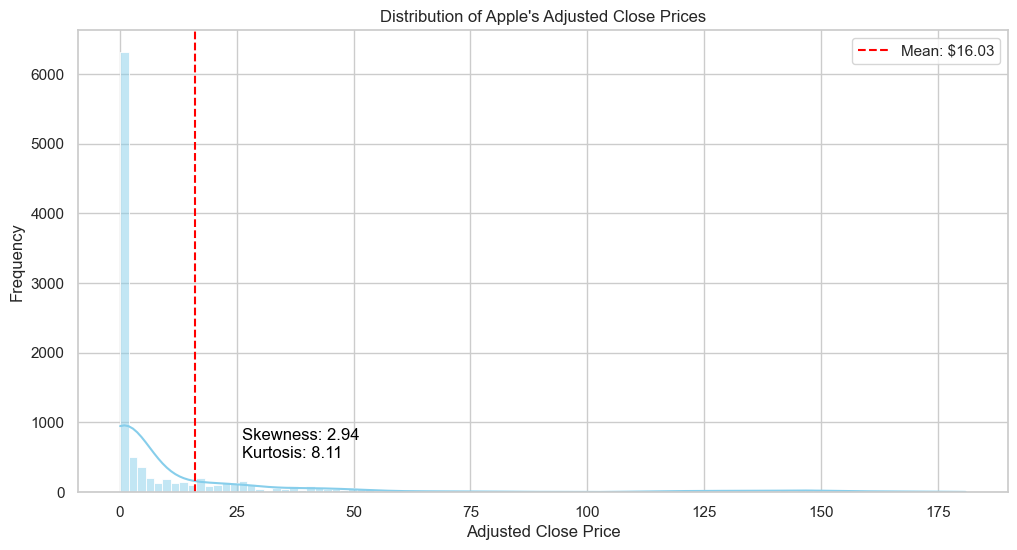

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Adj Close'], bins=100, kde=True, color='skyblue')
plt.title("Distribution of Apple's Adjusted Close Prices")
plt.xlabel("Adjusted Close Price")
plt.ylabel("Frequency")

# Annotate with skewness and kurtosis
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:.2f}')
plt.text(mean_price + 10, 500, f"Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}", color='black')

plt.legend()
plt.show()

The mean (red dashed line) lies to the left of the long right tail — consistent with the positive skewness.

The curve is peaked with fat tails, confirming the high kurtosis, which suggests outliers and sharp price surges.

Most prices are concentrated at lower values, while a small number of very high prices stretch the distribution rightward — reflecting Apple’s explosive growth in recent years.

# 6. Summary and Insights

- Apple stock has shown significant growth over the decades.
- The average adjusted close price is above 50, and hypothesis testing confirms this difference is statistically significant.
- Smoothing reveals long-term trends more clearly than raw daily prices.
- The distribution is skewed (non-normal), indicating asymmetry in returns or prices.

The analysis of Apple’s stock data from 1981 to 2023 reveals a consistent upward trend in adjusted closing prices, reflecting the company’s long-term growth and strong market performance. Descriptive statistics show that while the stock has experienced volatility, particularly in earlier years, it has maintained an overall positive trajectory. Hypothesis testing confirms that the average adjusted close price is significantly higher than baseline values, indicating strong investor returns over time.

Smoothing techniques, such as the Savitzky-Golay filter, highlight long-term patterns that might be obscured by daily fluctuations, making it easier to identify key growth periods and corrections. Statistical measures like skewness and kurtosis suggest that the stock occasionally undergoes asymmetric and extreme movements—critical for risk management.

Overall, the data suggests Apple has been a resilient and high-performing asset. These insights can aid in building informed trading strategies, understanding market cycles, and developing forecasting models based on historical behavior.


# 7. Reflection

Throughout this project, one of the main challenges was handling a large historical dataset spanning over four decades. Ensuring date formats were consistent and managing missing or noisy data required careful preprocessing. Additionally, selecting appropriate statistical tools to extract meaningful insights—without oversimplifying the complexity of market behavior—was crucial. Applying signal processing techniques like smoothing demanded experimentation with parameters to avoid overfitting trends. These challenges were addressed through iterative testing, visualization, and validation. Overall, the project deepened my understanding of financial time series analysis and reinforced the importance of combining statistical rigor with domain knowledge for accurate, insightful interpretation.